<a href="https://colab.research.google.com/github/MaryamNikpasand/Grading/blob/main/Disc/grading_results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# inter rater reliability (disc)

### pearson's correlation

In [2]:
filepath_Disc = Path('/content/drive/MyDrive/PhD/Barocas/grading/LumbarDiscJointScoring_Main/scores/')
disc_excel_grades = [_ for _ in filepath_Disc.glob('*/Scores(discs)*.csv')]
disc_excel_grades.sort()

df_Arin = pd.read_csv(disc_excel_grades[0], header=None, usecols=[0, 1, 2, 3, 4, 5])
df_ladd = pd.read_csv(disc_excel_grades[1], header=None, usecols=[0, 1, 2, 3, 4, 5])
df_jill = pd.read_csv(disc_excel_grades[2], header=None, usecols=[0, 1, 2, 3, 4, 5])
df_taka = pd.read_csv(disc_excel_grades[3], header=None, usecols=[0, 1, 2, 3, 4, 5])

In [3]:
def redistribute(df):
    """
    this function takes as input a dataframe such as df_ladd
    divides each row into five rows, 
    adds ' L1_L2.png' to the end of the name, and keeps the right label
    we need to do this because we want to be consistent with results from regression/classification models
    """
    fnames = {1:' L1_L2.png', 2: ' L2_L3.png', 3: ' L3_L4.png', 4: ' L4_L5.png', 5: ' L5_S1.png'}
    names = []
    values = []
    for i in range(len(df)):
        k = df.iloc[i, 0]
        for j in range(1,6):
            v = df.iloc[i, j]
            if ~np.isnan(v):  # remove nan
              names.append(k+fnames[j])
              values.append(v)
    return pd.DataFrame({'name':names, 'label':values})

df_Arin_per_level = redistribute(df_Arin).rename(columns={'label':'Arin_label'})
df_ladd_per_level = redistribute(df_ladd).rename(columns={'label':'ladd_label'})
df_taka_per_level = redistribute(df_taka).rename(columns={'label':'taka_label'})
df_jill_per_level = redistribute(df_jill).rename(columns={'label':'jill_label'})

In [4]:
df_ladd_taka = df_ladd_per_level.merge(df_taka_per_level, how='inner', on='name')  # find intersection, keep both labels

In [5]:
# correlation between ladd and taka is 0.70
r_irr = np.corrcoef(x=df_ladd_taka.ladd_label.to_numpy(), y=df_ladd_taka.taka_label.to_numpy())
print(r_irr[0, 1])

0.7011419471270696


### percent agreement

In [6]:
ladd_taka_array = df_ladd_taka.iloc[:, 1:].to_numpy()
agree = np.where(ladd_taka_array[:, 0] == ladd_taka_array[:, 1])[0].shape[0]
percent_agreement = agree/ladd_taka_array.shape[0]
print(percent_agreement)

0.648473282442748


### visualizations


In [7]:
ladd_taka_array = df_ladd_taka.iloc[:, 1:].to_numpy()
confusion_matrix = np.histogram2d(x=ladd_taka_array[:,0], y=ladd_taka_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]
print(confusion_matrix)

# another way of calculating percent agreement or accuracy
# is to sum diagonal elements (correct or agreement)
# divide by the sum of the entire matrix
pct_agreement = confusion_matrix.trace()/confusion_matrix.sum()
print('percent agreement', pct_agreement)

[[  0.  25.  22.   1.   0.]
 [  3. 274. 333.   2.   0.]
 [  2. 244. 705.  45.   3.]
 [  0.  11. 176. 678.  11.]
 [  0.   0.   6.  37.  42.]]
percent agreement 0.648473282442748


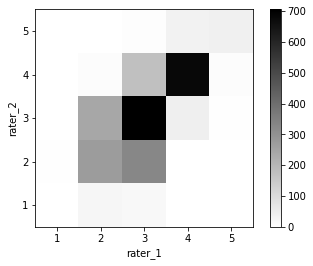

In [8]:
plt.figure()
plt.imshow(confusion_matrix, origin='lower', cmap=plt.cm.gray_r)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.xlabel('rater_1')
plt.ylabel('rater_2')
plt.show()


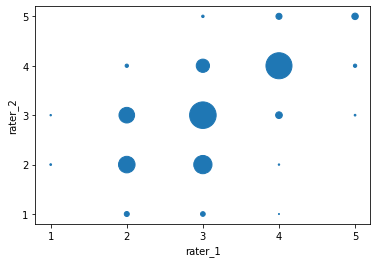

In [9]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
xv, yv = np.meshgrid(x, y)

plt.figure()
plt.scatter(xv, yv, s=confusion_matrix)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.yticks(ticks=[1, 2, 3, 4, 5])
plt.xlabel('rater_1')
plt.ylabel('rater_2')
plt.show()

# regression model results

In [10]:
df_regression_results = pd.read_csv('/content/drive/MyDrive/PhD/Barocas/grading/MyModels/DiscGrade/regression/regression_test_results.csv')
regression_results_array = df_regression_results.iloc[:, 2:].to_numpy()

In [11]:
# correlation between regression results and average_grade is 0.82
r_reg = np.corrcoef(x=regression_results_array[:,0], y=regression_results_array[:,1])
print(r_reg[0, 1])

0.8337336073655344


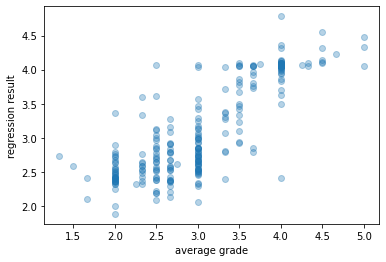

In [12]:
plt.figure()
plt.scatter(x=regression_results_array[:,1], y=regression_results_array[:,0], alpha=0.33)
plt.ylabel('regression result')
plt.xlabel('average grade')
plt.show()

In [13]:
confusion_matrix_reg = np.histogram2d(x=regression_results_array[:,0], y=regression_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]
# print(confusion_matrix_reg)

# regression accuracy using confusion matrix
regression_accuracy = confusion_matrix_reg.trace()/confusion_matrix_reg.sum()  # or percent agreement = sum(diagonal_elements)/sum(entire matrix)
print('regression accuracy', regression_accuracy)

confusion_matrix_reg[confusion_matrix_reg==0]=np.nan  # for plotting purposes

regression accuracy 0.7116104868913857


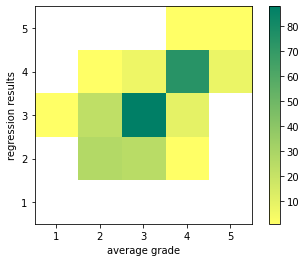

In [14]:
plt.figure()
plt.imshow(confusion_matrix_reg, origin='lower', cmap=plt.cm.summer_r)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.xlabel('average grade')
plt.ylabel('regression results')
plt.show()

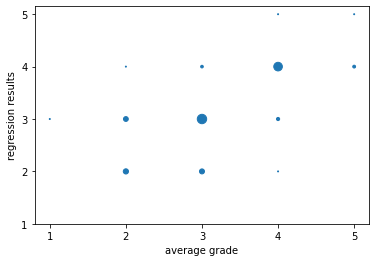

In [15]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
xv, yv = np.meshgrid(x, y)

plt.figure()
plt.scatter(xv, yv, s=confusion_matrix_reg)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.yticks(ticks=[1, 2, 3, 4, 5])
plt.ylabel('regression results')
plt.xlabel('average grade')
plt.show()

# classification results

In [16]:
df_classification_results = pd.read_csv('/content/drive/MyDrive/PhD/Barocas/grading/MyModels/DiscGrade/3D_CTscan/classification_test_results.csv', index_col=0)
classification_results_array = df_classification_results.iloc[:, 0:].to_numpy()


In [17]:
# pearson correlation is 0.82 (between classificaiton results and labels)
r_class = np.corrcoef(x=classification_results_array[:,0], y=classification_results_array[:,1])
print(r_class[0, 1])

0.8174157034286356


In [18]:
# percent agreement is 0.78 (between classificaiton results and labels)
agree = np.where(classification_results_array[:, 0] == classification_results_array[:, 1])[0].shape[0]
percent_agreement = agree/classification_results_array.shape[0]
print(percent_agreement)

0.7827715355805244


In [19]:
confusion_matrix_class = np.histogram2d(x=classification_results_array[:,0], y=classification_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]

# classification accuracy using confusion matrix
classification_accuracy = confusion_matrix_class.trace()/confusion_matrix_class.sum()  # or percent agreement = sum(diagonal_elements)/sum(entire matrix)
print('classification accuracy', classification_accuracy)

confusion_matrix_class[confusion_matrix_class==0]=np.nan  # for plotting purposes

print(confusion_matrix_class)

classification accuracy 0.7827715355805244
[[nan nan nan nan nan]
 [ 3. 45. 11. nan nan]
 [ 3. 17. 80.  7.  1.]
 [nan nan  9. 78.  2.]
 [nan nan  1.  4.  6.]]


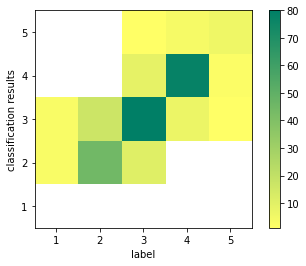

In [20]:
plt.figure()
plt.imshow(confusion_matrix_class, origin='lower', cmap=plt.cm.summer_r)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.ylabel('classification results')
plt.xlabel('label')
plt.show()


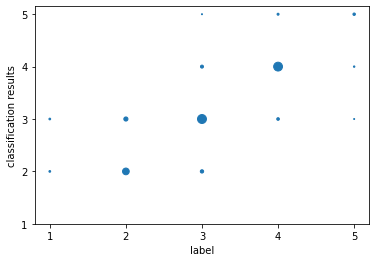

In [21]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
xv, yv = np.meshgrid(x, y)

plt.figure()
plt.scatter(xv, yv, s=confusion_matrix_class)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.yticks(ticks=[1, 2, 3, 4, 5])
plt.ylabel('classification results')
plt.xlabel('label')
plt.show()

# final plots

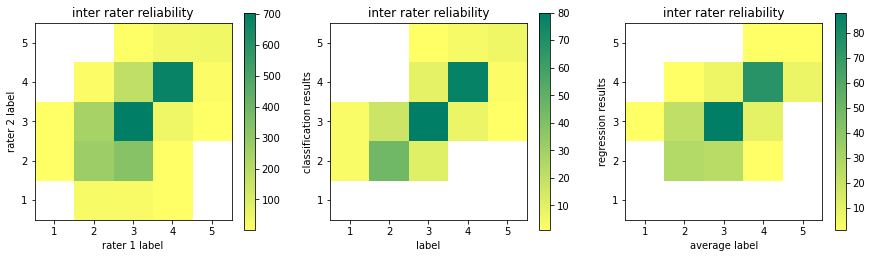

In [22]:
# not normalized (absolute numbers)
confusion_matrix = np.histogram2d(x=ladd_taka_array[:,0], y=ladd_taka_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]
confusion_matrix_reg = np.histogram2d(x=regression_results_array[:,0], y=regression_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]
confusion_matrix_class = np.histogram2d(x=classification_results_array[:,0], y=classification_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]])[0]

confusion_matrix[confusion_matrix==0]=np.nan
confusion_matrix_reg[confusion_matrix_reg==0]=np.nan
confusion_matrix_class[confusion_matrix_class==0]=np.nan

cm_choice = plt.cm.summer_r

plt.figure(figsize=[15,4])
plt.subplot(131)
plt.imshow(confusion_matrix, origin='lower', cmap=cm_choice)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.xlabel('rater 1 label')
plt.ylabel('rater 2 label')
plt.title('inter rater reliability')

plt.subplot(132)
plt.imshow(confusion_matrix_class, origin='lower', cmap=cm_choice)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.ylabel('classification results')
plt.xlabel('label')
plt.title('inter rater reliability')

plt.subplot(133)
plt.imshow(confusion_matrix_reg, origin='lower', cmap=cm_choice)
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.ylabel('regression results')
plt.xlabel('average label')
plt.title('inter rater reliability')

plt.show()


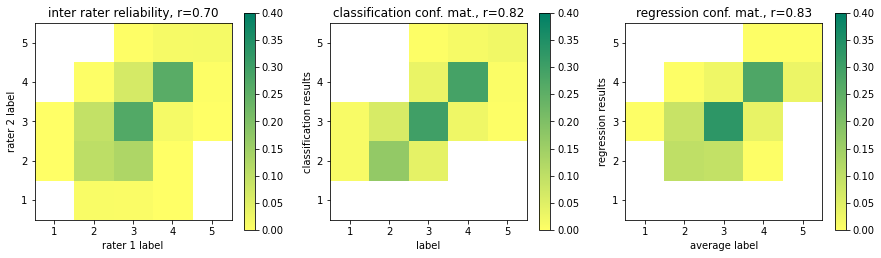

In [23]:
# not normalized (absolute numbers)
confusion_matrix = np.histogram2d(x=ladd_taka_array[:,0], y=ladd_taka_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]], density=True)[0]
confusion_matrix_reg = np.histogram2d(x=regression_results_array[:,0], y=regression_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]], density=True)[0]
confusion_matrix_class = np.histogram2d(x=classification_results_array[:,0], y=classification_results_array[:,1], bins=[5, 5], range=[[0.5,5.5], [0.5, 5.5]], density=True)[0]

confusion_matrix[confusion_matrix==0]=np.nan
confusion_matrix_reg[confusion_matrix_reg==0]=np.nan
confusion_matrix_class[confusion_matrix_class==0]=np.nan

cm_choice = plt.cm.summer_r

plt.figure(figsize=[15,4])
plt.subplot(131)
plt.imshow(confusion_matrix, origin='lower', cmap=cm_choice, clim=[0, 0.4])
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.xlabel('rater 1 label')
plt.ylabel('rater 2 label')
plt.title('inter rater reliability, r={:.2f}'.format(r_irr[0,1]))

plt.subplot(132)
plt.imshow(confusion_matrix_class, origin='lower', cmap=cm_choice, clim=[0, 0.4])
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.ylabel('classification results')
plt.xlabel('label')
plt.title('classification conf. mat., r={:.2f}'.format(r_class[0,1]))

plt.subplot(133)
plt.imshow(confusion_matrix_reg, origin='lower', cmap=cm_choice, clim=[0, 0.4])
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.ylabel('regression results')
plt.xlabel('average label')
plt.title('regression conf. mat., r={:.2f}'.format(r_reg[0,1]))

plt.show()
